In [1]:
from ase.io import read
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS
from matplotlib import colors
import matplotlib.pyplot as plt

In [2]:
# load data
RS_structures = read("data/RS_structures.xyz", index=':')
ZB_structures = read("data/ZB_structures.xyz", index=':')

def generate_table(RS_structures, ZB_structures):

    for RS, ZB in zip(RS_structures, ZB_structures):
        energy_diff = RS.info['energy'] - ZB.info['energy']
        min_struc_type = 'RS' if energy_diff < 0 else 'ZB'
        struc_obj_min = RS if energy_diff < 0 else ZB

        yield [RS.info['energy'], ZB.info['energy'],
               energy_diff, min_struc_type,
               RS.info['Z'], ZB.info['Z'],
               RS.info['period'], ZB.info['period'],
               RS.info['IP'], ZB.info['IP'],
               RS.info['EA'], ZB.info['EA'],
               RS.info['E_HOMO'], ZB.info['E_HOMO'],
               RS.info['E_LUMO'], ZB.info['E_LUMO'],
               RS.info['r_s'], ZB.info['r_s'],
               RS.info['r_p'], ZB.info['r_p'],
               RS.info['r_d'], ZB.info['r_d'],
               RS, ZB, struc_obj_min]
        
    
df = pd.DataFrame(
    generate_table(RS_structures, ZB_structures),
    columns=['energy_RS', 'energy_ZB', 
             'energy_diff', 'min_struc_type', 
             'Z(A)', 'Z(B)', 
             'period(A)', 'period(B)', 
             'IP(A)', 'IP(B)', 
             'EA(A)', 'EA(B)', 
             'E_HOMO(A)', 'E_HOMO(B)', 
             'E_LUMO(A)', 'E_LUMO(B)', 
             'r_s(A)', 'r_s(B)', 
             'r_p(A)', 'r_p(B)', 
             'r_d(A)', 'r_d(B)',
             'struc_obj_RS', 'struc_obj_ZB', 'struc_obj_min'],
    index=list(RS.get_chemical_formula() for RS in RS_structures)
)

# print data without structure objects
# df.drop(['struc_obj_RS', 'struc_obj_ZB', 'struc_obj_min'], axis=1)

In [3]:
features = []
features.append('energy_diff')
# features.append('energy_RS')
# features.append('energy_ZB')
features.append('Z(A)')
features.append('Z(B)')
features.append('IP(A)')
features.append('IP(B)')
features.append('EA(A)')
features.append('EA(B)')
features.append('E_HOMO(A)')
features.append('E_HOMO(B)')
features.append('E_LUMO(A)')
features.append('E_LUMO(B)')
features.append('r_s(A)')
features.append('r_s(B)')
features.append('r_p(A)')
features.append('r_p(B)')
features.append('r_d(A)')
features.append('r_d(B)')
            

In [4]:
data = df.filter(items=features).to_numpy()
data = preprocessing.scale(data)

---
# KMeans

In [5]:
cluster_labels = KMeans (n_clusters=3).fit_predict(data)

In [6]:
# df.insert(0,'cluster_label',kmeans.labels_)
# df.drop(['struc_obj_RS', 'struc_obj_ZB', 'struc_obj_min'], axis=1)

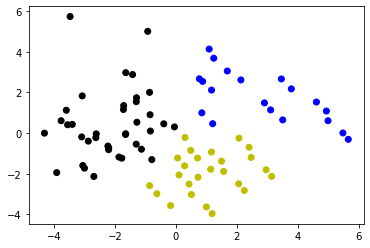

In [7]:
transformed_data = PCA(n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

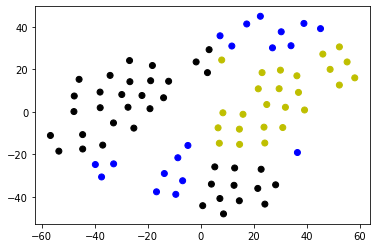

In [8]:
transformed_data = TSNE (n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

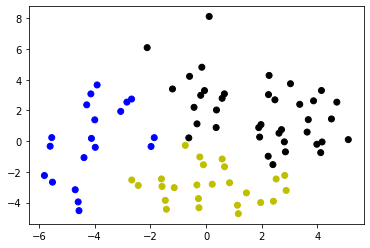

In [9]:
transformed_data = MDS (n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

---
# DBSCAN

In [10]:
cluster_labels = DBSCAN(eps=3, min_samples=5).fit_predict(data)

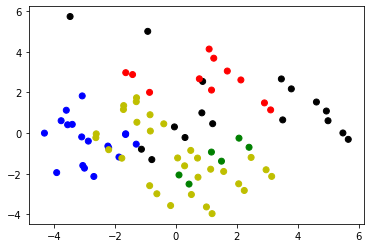

In [11]:
transformed_data = PCA(n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

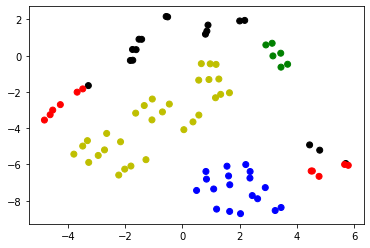

In [12]:
transformed_data = TSNE (n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

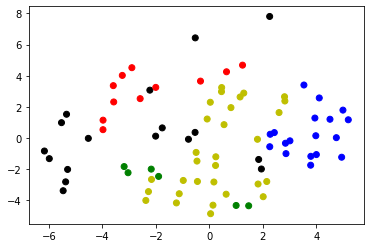

In [13]:
transformed_data = MDS (n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

---
# Agglomerative 

In [14]:
cluster_labels = AgglomerativeClustering(n_clusters=None, distance_threshold=17).fit_predict(data)

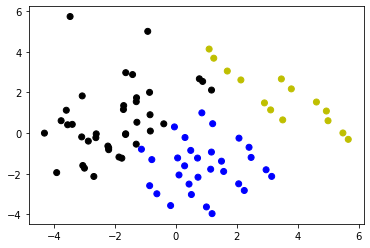

In [15]:
transformed_data = PCA(n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

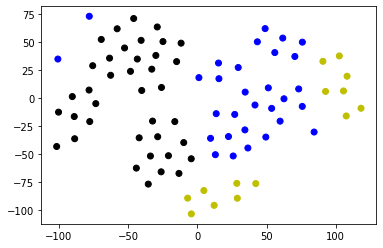

In [16]:
transformed_data = TSNE (n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))

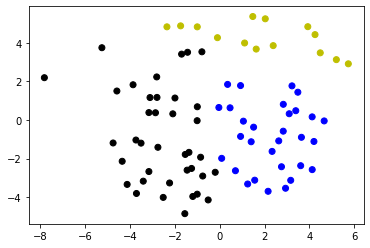

In [17]:
transformed_data = MDS (n_components=2).fit_transform(data)
cmap = colors.ListedColormap(['k','b','y','g','r'])
X,Y = transformed_data.T
plt.scatter(X,Y,color=cmap(cluster_labels))